# Preprocessing and Modeling

### Import Libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from modelling_functions import *
from DengueModel import *

import datetime

import warnings
warnings.simplefilter(action="ignore")

# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Import Data

In [2]:
# Import the dataset
data = pd.read_csv('../datasets/data_features_with_lags.csv')

In [3]:
# Check the data
data.head()

,time,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,Mean Temperature (°C)_lag28,Mean Temperature (°C)_lag51,Mean Wind Speed (km/h)_lag6,Mean Wind Speed (km/h)_lag22,Mean Wind Speed (km/h)_lag47,Maximum Temperature (°C)_lag10,Max Wind Speed (km/h)_lag14,Max Wind Speed (km/h)_lag41,Minimum Temperature (°C)_lag49,dengue_cases_lag_1,dengue_cases_lag_2,dengue_cases_lag_3,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2018-04-08,38,0.000,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.725411,0,0,1,0,0,0,0,0,0,0,0
1,2018-04-15,56,0.000,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,0.725367,0,0,1,0,0,0,0,0,0,0,0
2,2018-04-22,55,0.000,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,38.0,NaN,0.725189,0,0,1,0,0,0,0,0,0,0,0
3,2018-04-29,74,0.000,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,56.0,38.0,0.725087,0,0,1,0,0,0,0,0,0,0,0
4,2018-05-06,62,0.029,0.549,0.382,0.039,28.785714,8.328571,3.742857,34.2,44.6,23.6,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,55.0,56.0,0.712189,0,0,0,1,0,0,0,0,0,0,0


In [4]:
# Check the data
data.tail()

,time,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,Mean Temperature (°C)_lag28,Mean Temperature (°C)_lag51,Mean Wind Speed (km/h)_lag6,Mean Wind Speed (km/h)_lag22,Mean Wind Speed (km/h)_lag47,Maximum Temperature (°C)_lag10,Max Wind Speed (km/h)_lag14,Max Wind Speed (km/h)_lag41,Minimum Temperature (°C)_lag49,dengue_cases_lag_1,dengue_cases_lag_2,dengue_cases_lag_3,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
252,2023-02-05,219,0.214,0.108,0.623,0.055,26.057143,9.785714,8.171429,31.6,48.2,23.6,25,28.442857,26.342857,10.214286,6.671429,9.542857,33.9,37.8,40.7,23.2,223.0,186.0,273.0,0.689197,1,0,0,0,0,0,0,0,0,0,0
253,2023-02-12,148,0.214,0.108,0.623,0.055,27.085714,10.428571,7.828571,31.9,40.7,22.8,23,28.171429,27.628571,11.457143,7.685714,7.357143,32.9,51.9,29.6,23.4,219.0,223.0,186.0,0.688872,1,0,0,0,0,0,0,0,0,0,0
254,2023-02-19,138,0.214,0.108,0.623,0.055,27.028571,12.057143,9.142857,32.0,42.6,21.7,26,27.842857,27.171429,8.685714,8.171429,7.557143,32.7,40.7,44.4,24.7,148.0,219.0,223.0,0.688727,1,0,0,0,0,0,0,0,0,0,0
255,2023-02-26,111,0.214,0.108,0.623,0.055,27.471429,14.642857,1.971429,31.5,48.2,24.1,18,29.257143,27.614286,7.642857,6.785714,6.171429,32.2,40.7,38.9,23.8,138.0,148.0,219.0,0.688555,1,0,0,0,0,0,0,0,0,0,0
256,2023-03-05,119,0.214,0.108,0.623,0.055,25.800000,11.200000,78.200000,30.6,50.0,22.0,24,28.385714,28.114286,10.642857,6.914286,6.071429,31.7,46.3,51.9,23.0,111.0,138.0,148.0,0.688477,0,1,0,0,0,0,0,0,0,0,0


In [5]:
# Check the shape of the data
data.shape

(257, 37)

In [6]:
# Look at the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   time                            257 non-null    object 
 1   dengue_cases                    257 non-null    int64  
 2   denv_1                          257 non-null    float64
 3   denv_2                          257 non-null    float64
 4   denv_3                          257 non-null    float64
 5   denv_4                          257 non-null    float64
 6   Mean Temperature (°C)           257 non-null    float64
 7   Mean Wind Speed (km/h)          257 non-null    float64
 8   Daily Rainfall Total (mm)       257 non-null    float64
 9   Maximum Temperature (°C)        257 non-null    float64
 10  Max Wind Speed (km/h)           257 non-null    float64
 11  Minimum Temperature (°C)        257 non-null    float64
 12  google_trends                   257 

### Data Processing

The date feature is currently an object time. We will be converting it into a dateTime format.

In [7]:
# Convert the date column into dateTime format
data['time'] = pd.to_datetime(data['time'])

In [8]:
# Set the time as the index
data = data.set_index('time')

In [9]:
# Check the data 
data.head()

,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,Mean Temperature (°C)_lag28,Mean Temperature (°C)_lag51,Mean Wind Speed (km/h)_lag6,Mean Wind Speed (km/h)_lag22,Mean Wind Speed (km/h)_lag47,Maximum Temperature (°C)_lag10,Max Wind Speed (km/h)_lag14,Max Wind Speed (km/h)_lag41,Minimum Temperature (°C)_lag49,dengue_cases_lag_1,dengue_cases_lag_2,dengue_cases_lag_3,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-08,38,0.000,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.725411,0,0,1,0,0,0,0,0,0,0,0
2018-04-15,56,0.000,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,0.725367,0,0,1,0,0,0,0,0,0,0,0
2018-04-22,55,0.000,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,38.0,NaN,0.725189,0,0,1,0,0,0,0,0,0,0,0
2018-04-29,74,0.000,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,56.0,38.0,0.725087,0,0,1,0,0,0,0,0,0,0,0
2018-05-06,62,0.029,0.549,0.382,0.039,28.785714,8.328571,3.742857,34.2,44.6,23.6,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,55.0,56.0,0.712189,0,0,0,1,0,0,0,0,0,0,0


In [10]:
# Drop NA values
data.dropna(inplace=True)

In [11]:
# Drop the features we don't need
data.drop(columns=['denv_1', 'denv_2', 'denv_3', 'denv_4', 'month_2', 'month_3', 
                   'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 
                   'month_9', 'month_10', 'month_11', 'month_12', 
                   'Mean Wind Speed (km/h)', 'Maximum Temperature (°C)', 
                   'Max Wind Speed (km/h)', 'Minimum Temperature (°C)'], inplace=True)

### Train/Test Split

In [12]:
data.iloc[143] #last index for 2021

dengue_cases                      76.000000
Mean Temperature (°C)             27.785714
Daily Rainfall Total (mm)          1.514286
google_trends                     15.000000
Mean Temperature (°C)_lag28       28.757143
Mean Temperature (°C)_lag51       25.971429
Mean Wind Speed (km/h)_lag6        6.057143
Mean Wind Speed (km/h)_lag22       9.714286
Mean Wind Speed (km/h)_lag47      11.357143
Maximum Temperature (°C)_lag10    33.200000
Max Wind Speed (km/h)_lag14       44.400000
Max Wind Speed (km/h)_lag41       40.700000
Minimum Temperature (°C)_lag49    23.300000
dengue_cases_lag_1                68.000000
dengue_cases_lag_2                61.000000
dengue_cases_lag_3                64.000000
s_ratio                            0.729691
Name: 2021-12-26 00:00:00, dtype: float64

In [13]:
143/206 #We will have a 70-30 train test split

0.6941747572815534

In [14]:
train = data.iloc[:143]
test = data.iloc[143:]

In [15]:
train.shape

(143, 17)

In [16]:
test.shape

(63, 17)

Overall, this is about a 30% train test split:
* Train: 70% of data
* Test: 30% of data

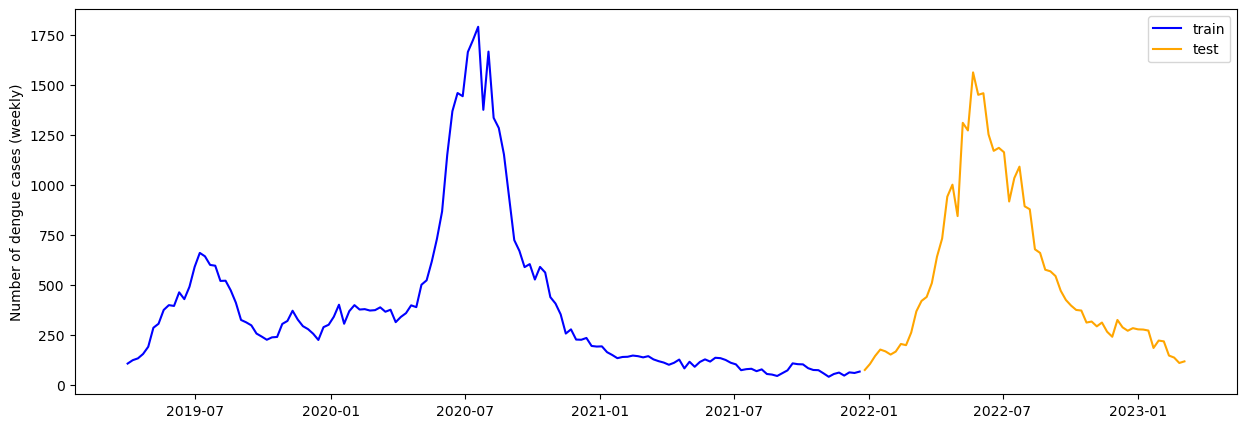

In [17]:
# Time series plot of the train and test data
train_test_plot(train, test)

### Stationarity Test

We will use the stationarity test to identify the $d$ parameter for the ARIMA model

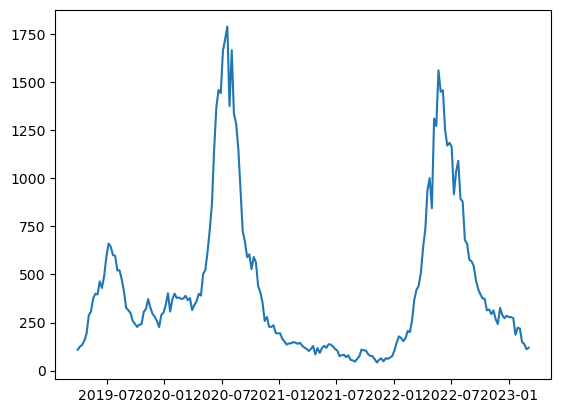

In [18]:
# Plot the data
plt.plot(data['dengue_cases']);

The time series of the dengue cases is clearly not stationary

In [19]:
# Instantiate a new dataframe for the difference information
diff = pd.DataFrame()

In [20]:
# Calculate the first difference of the dengue cases
diff['first_diff_dengue'] = data['dengue_cases'].diff()

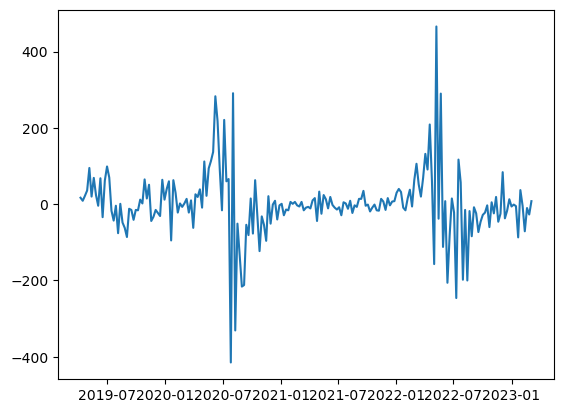

In [21]:
# Plot the first difference of the dengue cases
plt.plot(diff['first_diff_dengue']);

From the plot above, we can see that when the data is differenced once, the data is stationary. 

#### Augmented Dickey-Fuller Test

Let's also use the ADF test to test for Stationarity

In [22]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [23]:
# Run the ADF test on the original dengue data
interpret_dftest(adfuller(data['dengue_cases']))

Test Statistic   -3.437088
p-value           0.009758
dtype: float64

The p-value is above 0.05, hence this data is not stationary.

In [24]:
# Run the ADF test on the differenced dengue data
interpret_dftest(adfuller(data['dengue_cases'].diff().dropna()))

Test Statistic   -4.678026
p-value           0.000093
dtype: float64

The p-value is below 0.05 and we can conclude that the once differenced data is stationary. This is also in line with the differenced data plot. Hence, we can set the $d$ value to $1$.

### Finding the $p$ and $q$ values

We can use a ACF and PACF plot to find the $p$ and $q$ values.

#### ACF and PACF Plot for $p$ value

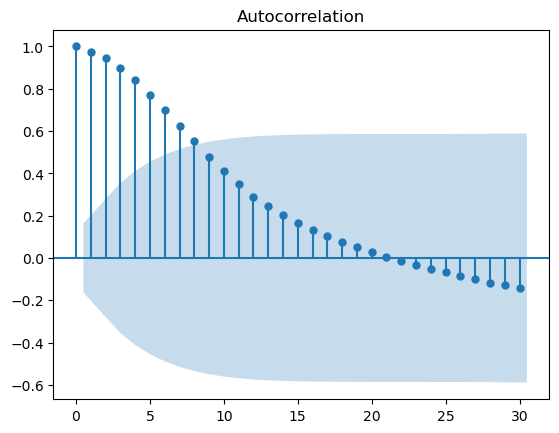

In [25]:
# Generate autocorrelation plot on training data.
plot_acf(train['dengue_cases'], lags = 30);

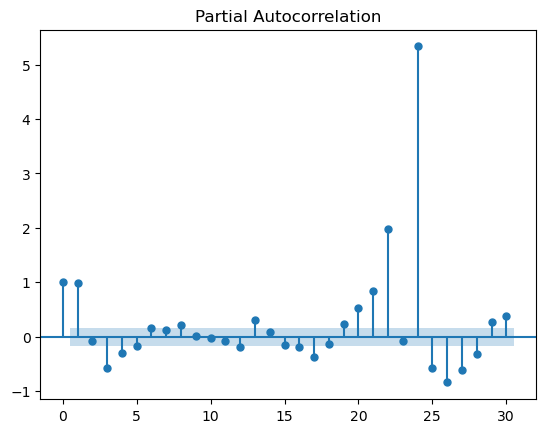

In [26]:
# Generate partial autocorrelation plot on training data.
plot_pacf(train['dengue_cases'], lags = 30);

The first lag of the ACF plot is also positive. There is also a sharp cut off in the PACF plot after the second lag. Hence, we can take the next lag of the PACF as the $p$ value and set it to $3$. 

As the $AR$ and $MA$ terms might work against each other and we were able to identify the $p$ value, we will set the $q$ value as $0$.  

### ARIMA Model (3, 1, 0)

The performance is very bad as the ARIMA model is just predicting a flat line.

Next, we can fit the ARIMA model and run the prediction.

RMSE = 616

In [27]:
# Instantiate best model.
arima = ARIMA(endog=train['dengue_cases'], order=(3, 1, 0))

# Fit ARIMA model.
model = arima.fit()

# Generate predictions based on test set
preds = model.predict(start=test.index[0], end=test.index[-1])

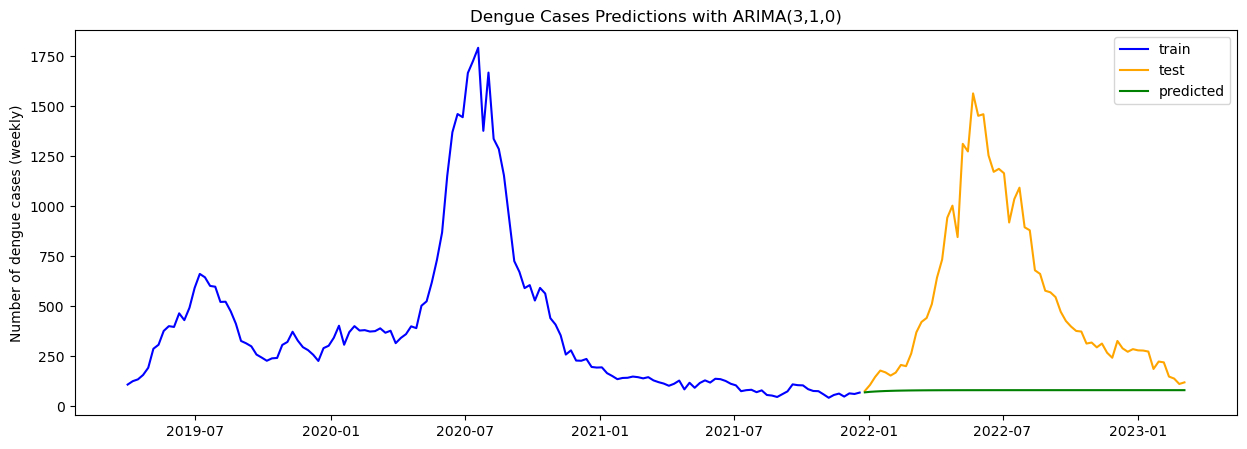

In [28]:
# Plot the time series plot
train_test_plot(train, test, preds, title='Dengue Cases Predictions with ARIMA(3,1,0)')

In [29]:
# Evaluate the model
evaluate_model(test['dengue_cases'], preds)

RMSE: 616.5309593556055

Minimum Dengue Cases: 76
Maximum Dengue Cases: 1563
RMSE relative to minimum values in dengue cases: 8.11.
RMSE relative to maximum values in dengue cases: 0.39.


616.5309593556055

Looking at the MSE values as well as the ratio of the mean squared error to the minimum and maximum values in the dengue cases, we can see that the model is not very good. 

#### Residual Plot

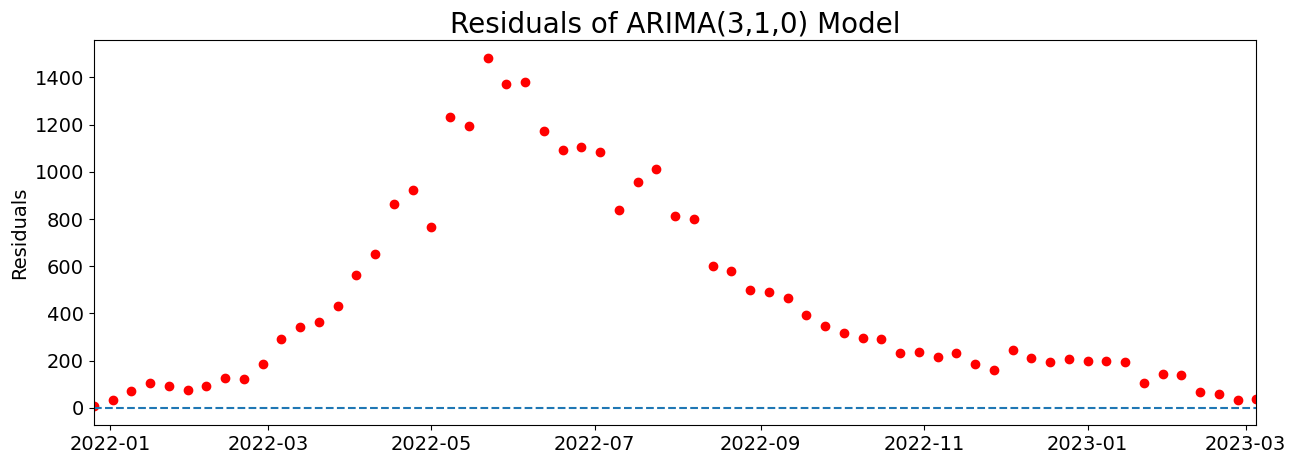

In [30]:
resid = plot_residuals(test['dengue_cases'], preds, title='Residuals of ARIMA(3,1,0) Model')

From the residual plot, we can see that the prediction is off to a high degree.

### ARIMAX

We add on predictor variables to form the ARIMAX model and find that (1, 1, 2) works best. The RMSE is, however, still bad. 

RMSE = 261

In [31]:
train.columns

Index(['dengue_cases', 'Mean Temperature (°C)', 'Daily Rainfall Total (mm)',
       'google_trends', 'Mean Temperature (°C)_lag28',
       'Mean Temperature (°C)_lag51', 'Mean Wind Speed (km/h)_lag6',
       'Mean Wind Speed (km/h)_lag22', 'Mean Wind Speed (km/h)_lag47',
       'Maximum Temperature (°C)_lag10', 'Max Wind Speed (km/h)_lag14',
       'Max Wind Speed (km/h)_lag41', 'Minimum Temperature (°C)_lag49',
       'dengue_cases_lag_1', 'dengue_cases_lag_2', 'dengue_cases_lag_3',
       's_ratio'],
      dtype='object')

In [32]:
# Instantiate best model.
arimax = ARIMA(endog=train['dengue_cases'], order=(1, 1, 2), 
               exog=train.drop(columns=['dengue_cases']))

# Fit ARIMA model.
model = arimax.fit()

# Generate predictions based on test set.
preds = model.predict(start=test.index[0], end=test.index[-1], exog=test.drop(columns=['dengue_cases']))

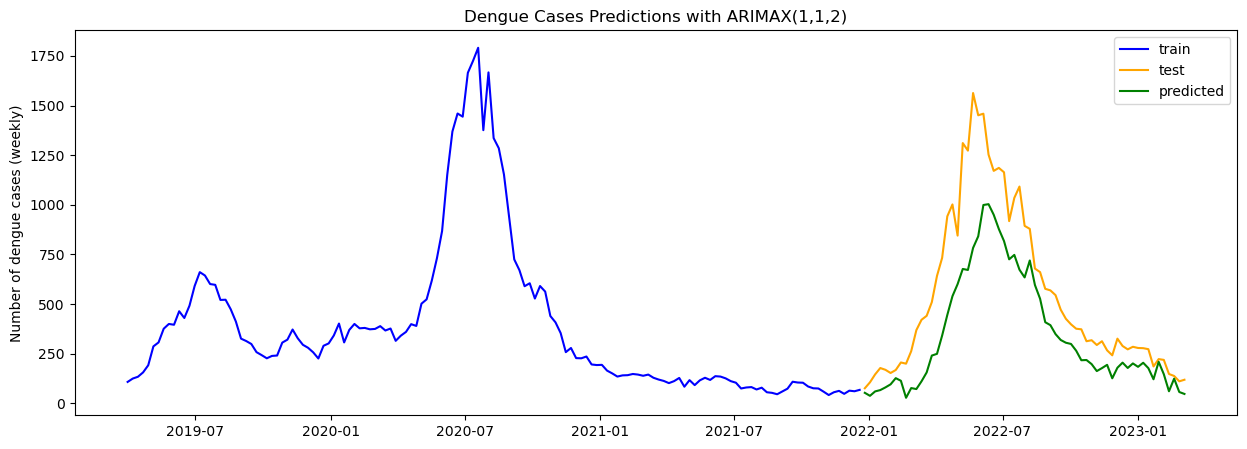

In [33]:
# plot data
train_test_plot(train, test, preds, title='Dengue Cases Predictions with ARIMAX(1,1,2)')

In [34]:
evaluate_model(test['dengue_cases'], preds)

RMSE: 261.9051990182753

Minimum Dengue Cases: 76
Maximum Dengue Cases: 1563
RMSE relative to minimum values in dengue cases: 3.45.
RMSE relative to maximum values in dengue cases: 0.17.


261.9051990182753

#### Residual Plot

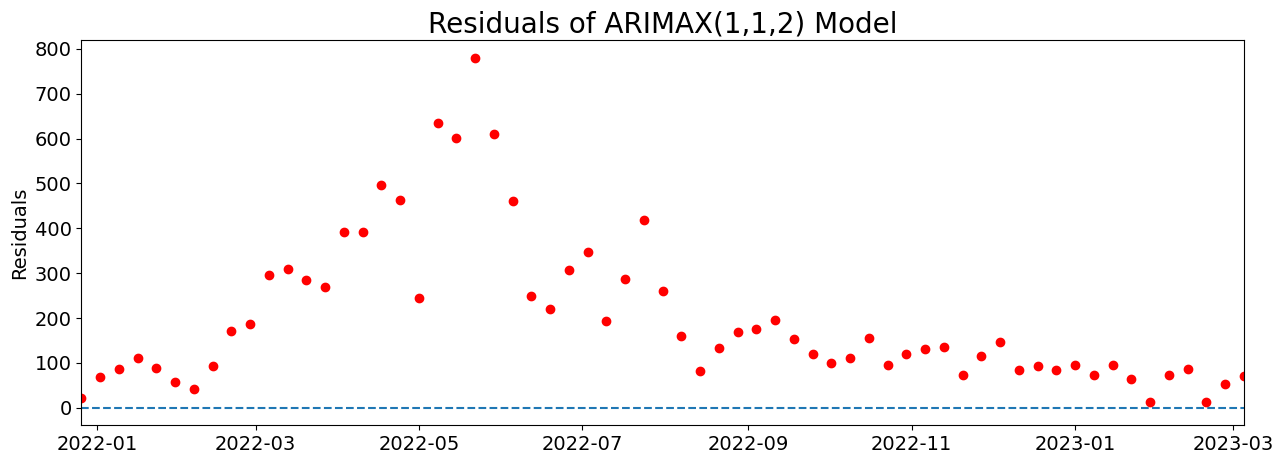

In [35]:
resid = plot_residuals(test['dengue_cases'], preds, title='Residuals of ARIMAX(1,1,2) Model')

### SARIMA Model without Exogenous Variables

We noticed some annual seasonality, hence we try out the SARIMA model first. RMSE gets better.

RMSE = 358

In [36]:
%%time
sarimax = SARIMAX(endog=train['dengue_cases'],
                dates=train.index,
                order=(1,1,2),
                seasonal_order=(1,1,0,48),
                enforce_stationarity=False, # speed up model fitting
                enforce_invertibility=False # speed up model fitting
               )

model = sarimax.fit(maxiter=50, method='lbfgs')

preds = model.predict(start=test.index[0], end=test.index[-1])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81786D+00    |proj g|=  4.96120D-02

At iterate    5    f=  1.80830D+00    |proj g|=  3.34426D-03

At iterate   10    f=  1.80185D+00    |proj g|=  3.42239D-03

At iterate   15    f=  1.80085D+00    |proj g|=  4.92986D-02

At iterate   20    f=  1.79225D+00    |proj g|=  3.01196D-02
  ys=-2.516E-02  -gs= 3.994E-02 BFGS update SKIPPED

At iterate   25    f=  1.71919D+00    |proj g|=  8.26742D-02

At iterate   30    f=  1.67926D+00    |proj g|=  1.43541D-01

At iterate   35    f=  1.65998D+00    |proj g|=  2.86537D-02

At iterate   40    f=  1.65404D+00    |proj g|=  8.50152D-03

At iterate   45    f=  1.65399D+00    |proj g|=  1.85769D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

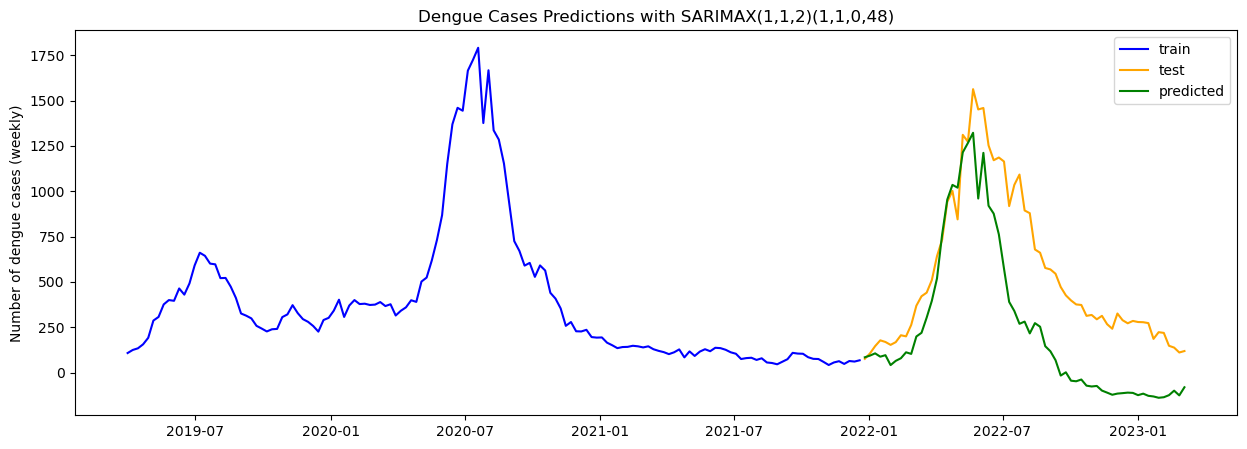

In [37]:
# Plot the data
train_test_plot(train, test, preds, title='Dengue Cases Predictions with SARIMAX(1,1,2)(1,1,0,48)')

In [38]:
# Evaluate the model
evaluate_model(test['dengue_cases'], preds)

RMSE: 358.6458579327231

Minimum Dengue Cases: 76
Maximum Dengue Cases: 1563
RMSE relative to minimum values in dengue cases: 4.72.
RMSE relative to maximum values in dengue cases: 0.23.


358.6458579327231

#### Residual Plot

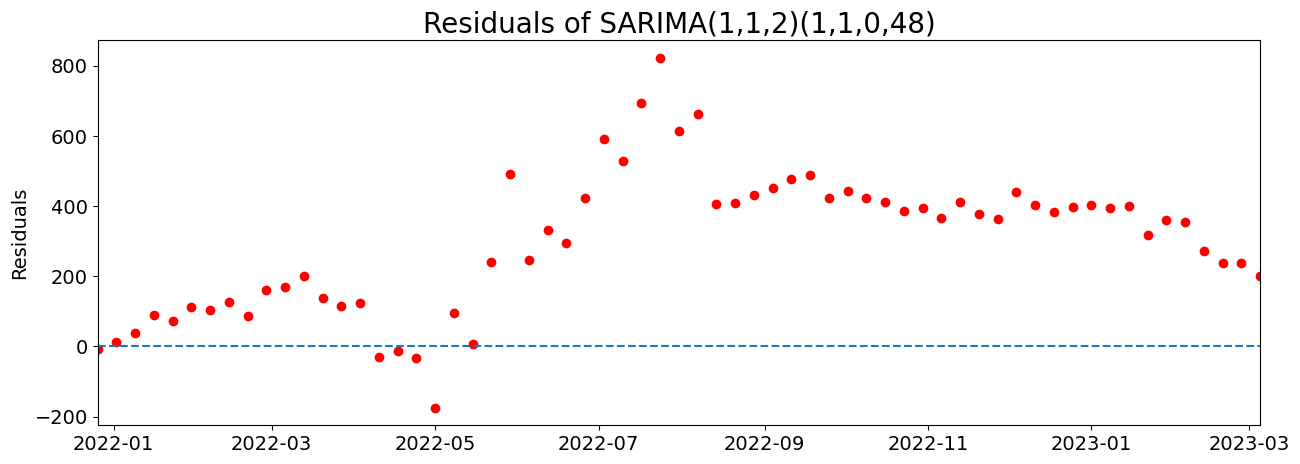

In [39]:
resid = plot_residuals(test['dengue_cases'], preds, title='Residuals of SARIMA(1,1,2)(1,1,0,48)')

### SARIMAX Model with Exogenous Variables

We further add predictor variables into SARIMAX model, and note that the RMSE further improves.

RMSE = 102

In [40]:
%%time
sarimax = SARIMAX(endog=train['dengue_cases'], exog=train.drop(columns=['dengue_cases']),
                dates=train.index,
                order=(1,1,2),
                seasonal_order=(1,1,0,48),
                enforce_stationarity=False, # speed up model fitting
                enforce_invertibility=False # speed up model fitting
               )

model = sarimax.fit(maxiter=50, method='lbfgs')

preds = model.predict(start=test.index[0], end=test.index[-1],
                           exog=test.drop(columns=['dengue_cases']))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75271D+00    |proj g|=  5.10586D-02

At iterate    5    f=  1.73698D+00    |proj g|=  1.44218D-02

At iterate   10    f=  1.73185D+00    |proj g|=  1.70997D-02

At iterate   15    f=  1.72699D+00    |proj g|=  1.80348D-02

At iterate   20    f=  1.72540D+00    |proj g|=  3.36811D-03

At iterate   25    f=  1.72250D+00    |proj g|=  1.87944D-02

At iterate   30    f=  1.71727D+00    |proj g|=  8.08970D-03

At iterate   35    f=  1.71382D+00    |proj g|=  1.45998D-02

At iterate   40    f=  1.69799D+00    |proj g|=  2.98225D-02

At iterate   45    f=  1.69657D+00    |proj g|=  9.01132D-03

At iterate   50    f=  1.69039D+00    |proj g|=  3.16330D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

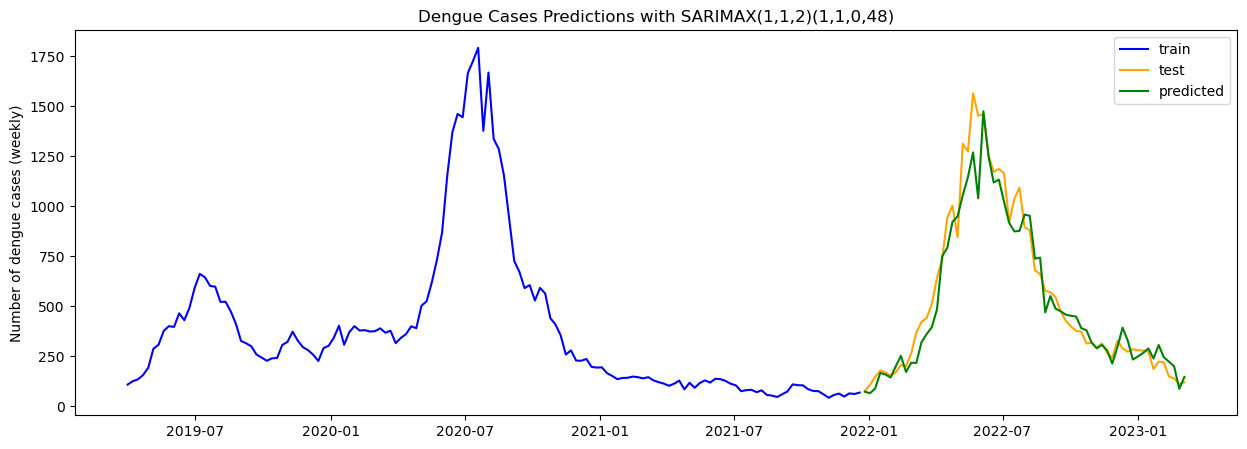

In [41]:
# Plot the data
train_test_plot(train, test, preds, title='Dengue Cases Predictions with SARIMAX(1,1,2)(1,1,0,48)')

In [42]:
# Evaluate the results
evaluate_model(test['dengue_cases'], preds)

RMSE: 102.15407682856782

Minimum Dengue Cases: 76
Maximum Dengue Cases: 1563
RMSE relative to minimum values in dengue cases: 1.34.
RMSE relative to maximum values in dengue cases: 0.07.


102.15407682856782

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        dengue_cases   No. Observations:                  143
Model:             SARIMAX(1, 1, 2)x(1, 1, [], 48)   Log Likelihood                -241.725
Date:                             Wed, 26 Apr 2023   AIC                            525.450
Time:                                     11:27:57   BIC                            563.390
Sample:                                 03-31-2019   HQIC                           539.594
                                      - 12-19-2021                                         
Covariance Type:                               opg                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Mean Temperature (°C)             -3.1003     38.097     -0.081      0.935     -77.770      71.569
Daily Rainfall Total (mm)          0.3933      3.386      0.116      0.908      -6.243       7.030
google_trends                      7.5245      6.419      1.172      0.241      -5.056      20.105
Mean Temperature (°C)_lag28       18.6550     33.885      0.551      0.582     -47.759      85.069
Mean Temperature (°C)_lag51        9.3862     39.386      0.238      0.812     -67.808      86.581
Mean Wind Speed (km/h)_lag6       -0.3470     13.198     -0.026      0.979     -26.216      25.521
Mean Wind Speed (km/h)_lag22      -3.8638     13.286     -0.291      0.771     -29.904      22.177
Mean Wind Speed (km/h)_lag47       5.4111     11.005      0.492      0.623     -16.158      26.980
Maximum Temperature (°C)_lag10    23.9028     29.899      0.799      0.424     -34.699      82.504
Max Wind Speed (km/h)_lag14       -3.2441      3.710     -0.874      0.382     -10.516       4.028
Max Wind Speed (km/h)_lag41       -1.0951      2.099     -0.522      0.602      -5.210       3.019
Minimum Temperature (°C)_lag49     5.5809     15.415      0.362      0.717     -24.631      35.793
dengue_cases_lag_1                 0.2944      0.634      0.465      0.642      -0.947       1.536
dengue_cases_lag_2                 0.5815      0.424      1.370      0.171      -0.250       1.413
dengue_cases_lag_3                -0.2672      0.628     -0.425      0.671      -1.499       0.964
s_ratio                          345.1070   1846.855      0.187      0.852   -3274.662    3964.876
ar.L1                              0.0516      0.995      0.052      0.959      -1.899       2.002
ma.L1                              0.0462      2.648      0.017      0.986      -5.144       5.237
ma.L2                             -0.9273      2.062     -0.450      0.653      -4.968       3.114
ar.S.L48                          -0.5822      0.302     -1.926      0.054      -1.175       0.010
sigma2                          3726.8002   6718.903      0.555      0.579   -9442.008    1.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.36   Prob(JB):                         0.52
Heteroskedasticity (H):               1.58   Skew:                             0.30
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Residual Plot

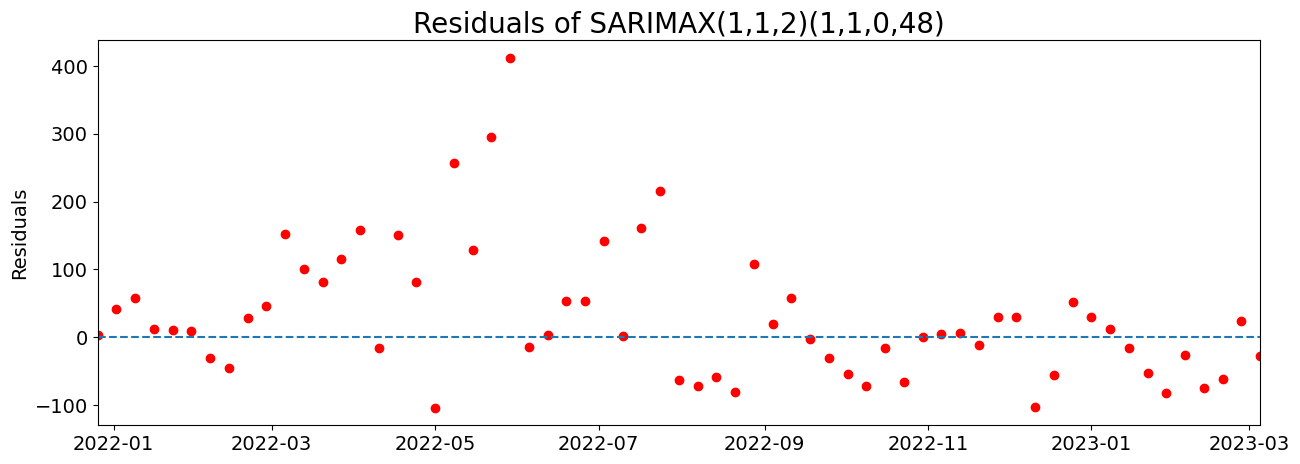

In [44]:
resid = plot_residuals(test['dengue_cases'], preds, title='Residuals of SARIMAX(1,1,2)(1,1,0,48)')

### Gradient Boosting

We try another set of models that are not time series in nature. First, gradient boosting which improves RMSE even further.

RMSE = 113

In [45]:
# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)

# Fit the model to the training data
model.fit(train.drop(columns='dengue_cases'), train['dengue_cases'])

# Make predictions on the test set
preds = pd.Series(model.predict(test.drop(columns='dengue_cases')), index=test.index)

In [46]:
evaluate_model(test['dengue_cases'], preds)

RMSE: 113.99237105739246

Minimum Dengue Cases: 76
Maximum Dengue Cases: 1563
RMSE relative to minimum values in dengue cases: 1.5.
RMSE relative to maximum values in dengue cases: 0.07.


113.99237105739246

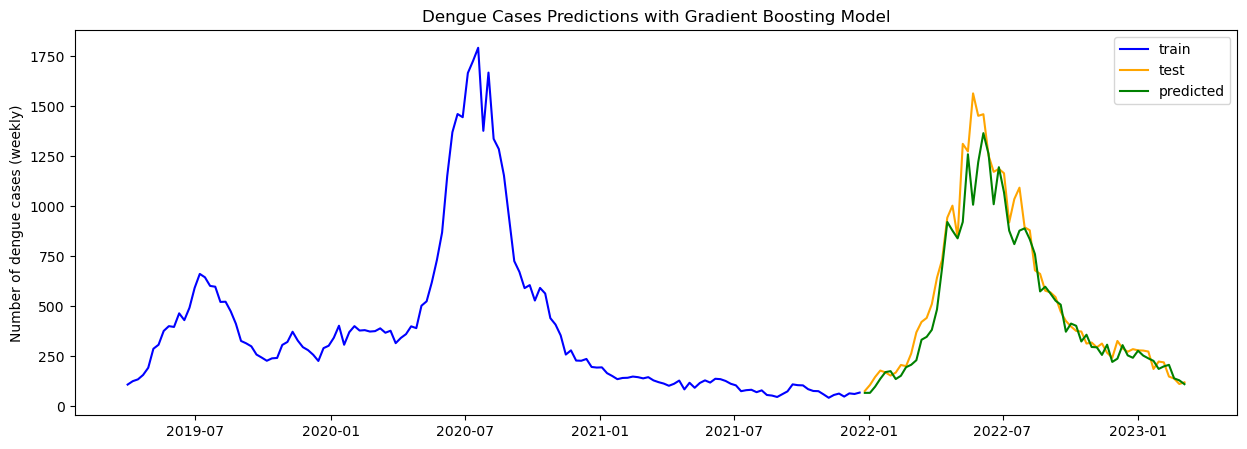

In [47]:
train_test_plot(train, test, preds, title='Dengue Cases Predictions with Gradient Boosting Model')

**Residual Plot**

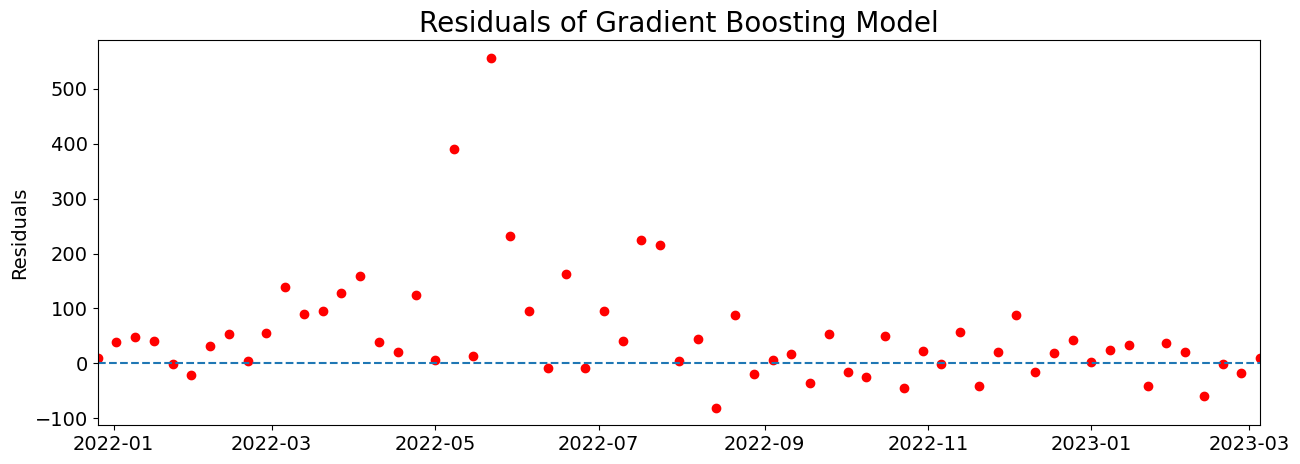

In [48]:
resid = plot_residuals(test['dengue_cases'], preds, title='Residuals of Gradient Boosting Model')

### Support Vector Machines

We also try SVM, which performs marginally worse than Gradient Boosting.

RMSE = 95

In [49]:
# Create the SVM model
svm = SVR(kernel='linear')

# Fit the SVM model on the training data
svm.fit(train.drop(columns='dengue_cases'), train['dengue_cases'])

# Make predictions on the test data
preds = pd.Series(svm.predict(test.drop(columns='dengue_cases')), index=test.index)

In [50]:
evaluate_model(test['dengue_cases'], preds)

RMSE: 95.57785894325855

Minimum Dengue Cases: 76
Maximum Dengue Cases: 1563
RMSE relative to minimum values in dengue cases: 1.26.
RMSE relative to maximum values in dengue cases: 0.06.


95.57785894325855

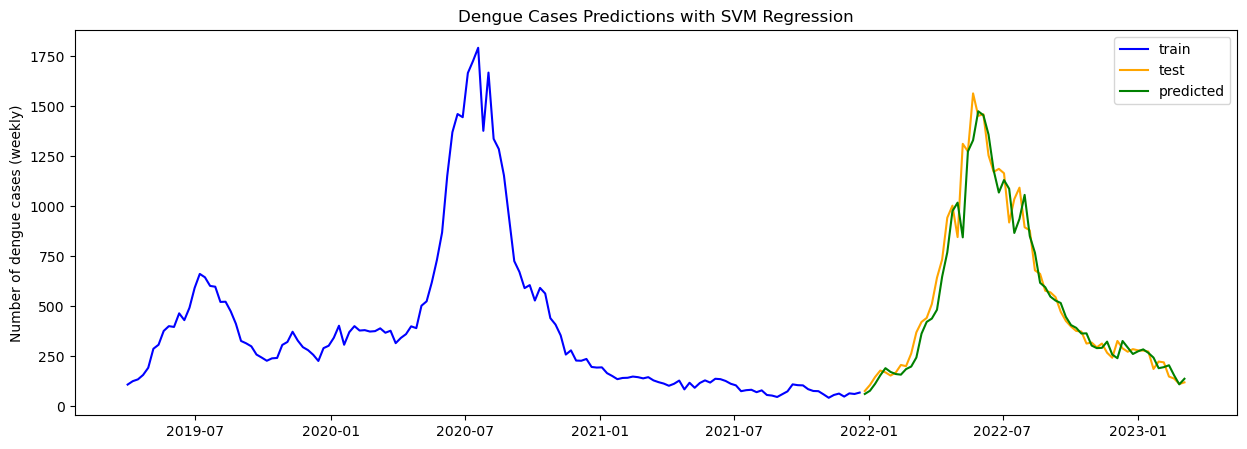

In [51]:
train_test_plot(train, test, preds, title='Dengue Cases Predictions with SVM Regression')

**Residual Plot**

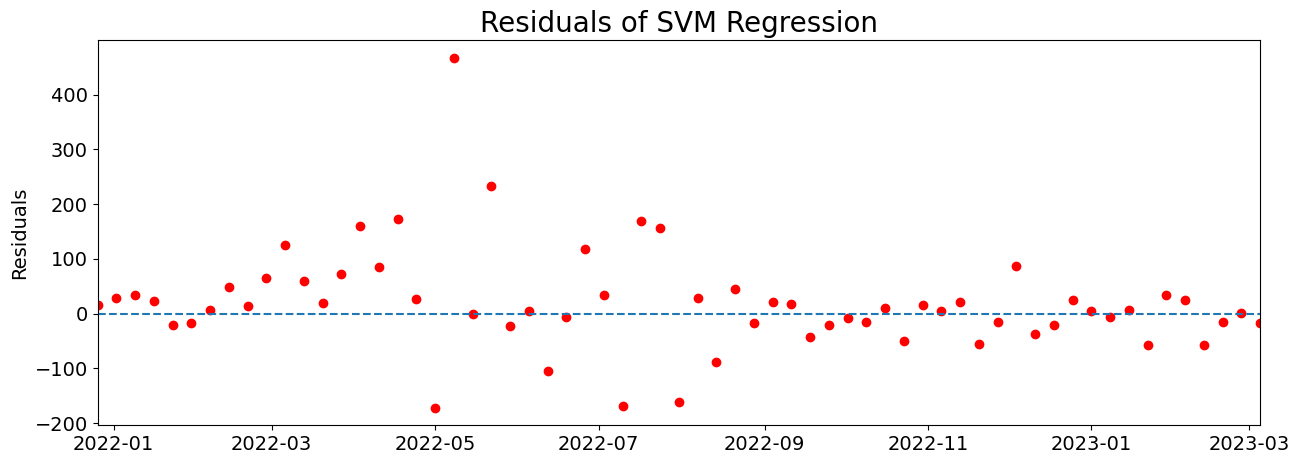

In [52]:
resid = plot_residuals(test['dengue_cases'], preds, title='Residuals of SVM Regression')

### Decision Tree and Bagging

We also try tree models. First, Bagging tree performs worse than Gradient Boosting.

RMSE = 110

In [53]:
# Define the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)

# Define the bagging regressor
n_estimators = 10
bagging = BaggingRegressor(base_estimator=base_estimator, n_estimators=n_estimators)

# Fit the bagging regressor on the training data
bagging.fit(train.drop(columns='dengue_cases'), train['dengue_cases'])

# Make predictions on the test data
preds = pd.Series(bagging.predict(test.drop(columns='dengue_cases')), index=test.index)


In [54]:
evaluate_model(test['dengue_cases'], preds)

RMSE: 110.4819662453531

Minimum Dengue Cases: 76
Maximum Dengue Cases: 1563
RMSE relative to minimum values in dengue cases: 1.45.
RMSE relative to maximum values in dengue cases: 0.07.


110.4819662453531

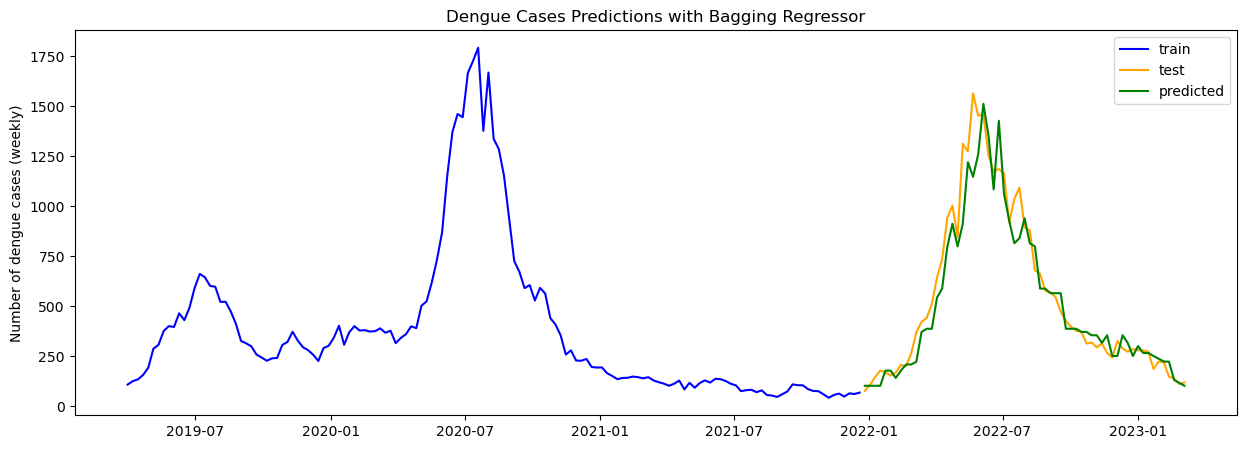

In [55]:
train_test_plot(train, test, preds, title='Dengue Cases Predictions with Bagging Regressor')

**Residual Plot**

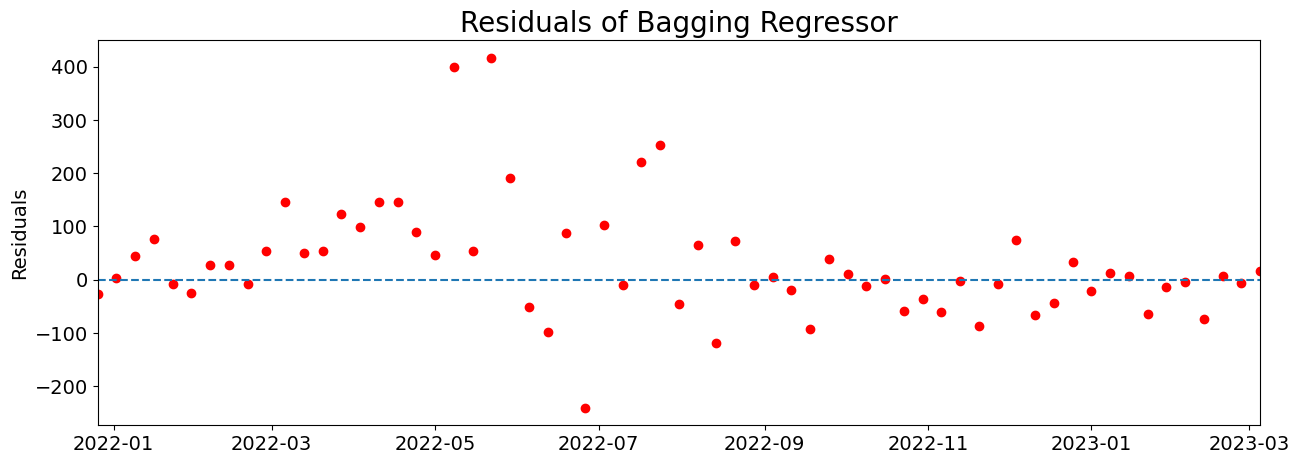

In [56]:
resid = plot_residuals(test['dengue_cases'], preds, title='Residuals of Bagging Regressor')

### Random Forest

We also try another tree model - Random Forest Regressor - which performs marginally better than Bagging Regressor but comparable to Gradiant Boosting.

RMSE = 196

In [57]:
# keep 2023 data as the unseen dataset for final testing
data_subset = data.loc[data.index.year < 2023, :]

In [58]:
# Lag predictors by 1 week to produce 1-week ahead forecast
columns_to_shift = list(data_subset.columns)
columns_to_shift.remove('dengue_cases')

data_subset[columns_to_shift] = data_subset[columns_to_shift].shift(1)

In [59]:
# drop any remaining NA values
data_subset.dropna(inplace=True)

We use the last full year - 2022 - as the test year when doing validation and model choice.

In [60]:
# Train test split
train, test = train_test_split(data_subset, year=2021)

In [61]:
train.shape

(143, 17)

In [62]:
test.shape

(52, 17)

In [63]:
55/144

0.3819444444444444

Overall, this is about a 40% train test split:
* Train: 60% of data
* Test: 40% of data

In [64]:
# set hyparameters (best ones)
rf_params = {
    'n_estimators':1000, 
    'random_state':42
}

In [65]:
results = test_rf_model(data_subset, test_year=2022, vars_lag=None, num_lag=0, rf_params=rf_params)

In [66]:
results.keys()

dict_keys(['model', 'preds_train', 'preds_test', 'rmse_train', 'rmse_test', 'mape_train', 'mape_test'])

In [67]:
evaluate_model(test['dengue_cases'], results['preds_test'])

RMSE: 196.36598477093148

Minimum Dengue Cases: 106
Maximum Dengue Cases: 1563
RMSE relative to minimum values in dengue cases: 1.85.
RMSE relative to maximum values in dengue cases: 0.13.


196.36598477093148

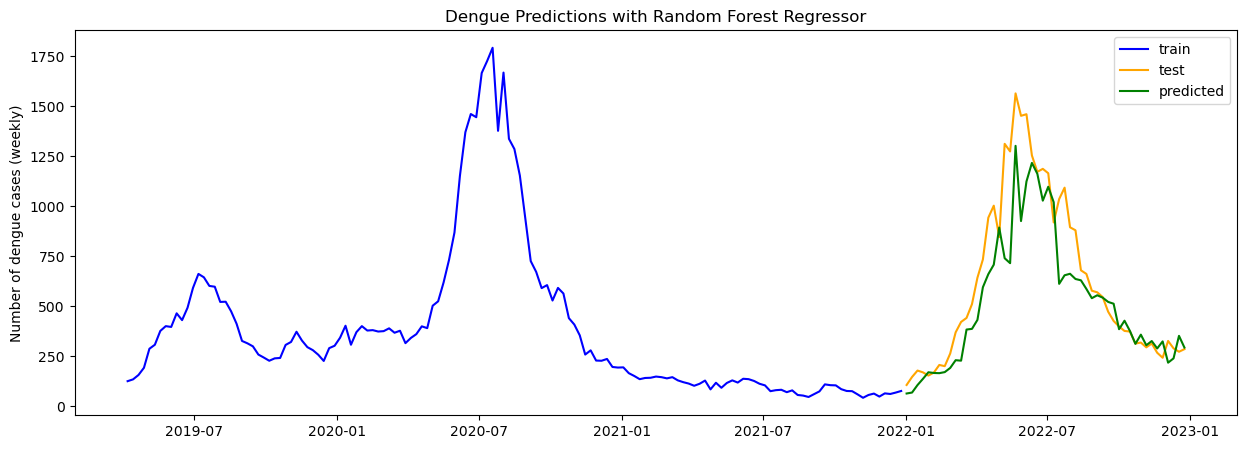

In [68]:
train_test_plot(train, test, results['preds_test'], title='Dengue Predictions with Random Forest Regressor')

**Residual Plot**

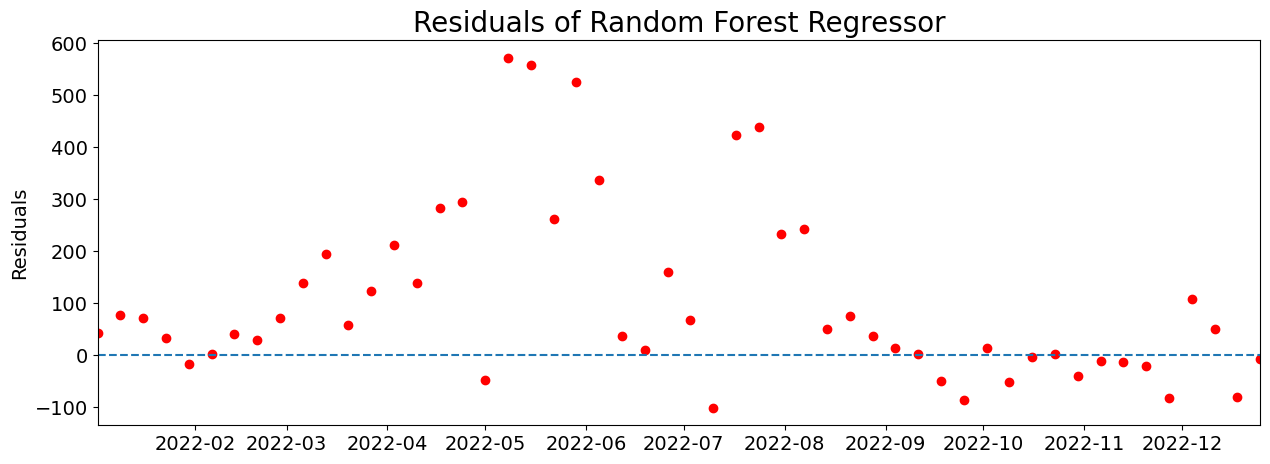

In [69]:
resid = plot_residuals(test['dengue_cases'], results['preds_test'].squeeze(), title='Residuals of Random Forest Regressor')